In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = pd.read_csv("/content/Race_Strategy_Dataset.csv")

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load dataset
# data = pd.read_csv("/content/Race_Strategy_Dataset.csv")

# # Split data (80% train, 20% test)
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# # Save the datasets
# train_data.to_csv("train_data.csv", index=False)
# test_data.to_csv("test_data.csv", index=False)

# print("Data successfully split and saved!")


In [ ]:
data.head()

,Lap,Temperature,Weather,Track_Surface,Downforce_Setup,Driving_Style,Race_Strategy,Safety_Car,Competitor_Strategy,Laps_Remaining,Tire_Compound
0,52,20,Sunny,Smooth,Medium,Aggressive,Two-stop,No,Undercut,18,Medium
1,15,11,Mixed,Moderate,High,Balanced,Two-stop,No,Overcut,55,Intermediate
2,61,12,Cloudy,Moderate,Low,Aggressive,Two-stop,No,Undercut,9,Soft
3,21,32,Rainy,Rough,High,Aggressive,One-stop,No,Neutral,49,Wet
4,24,21,Cloudy,Moderate,Low,Conservative,Three-stop,Yes,Undercut,46,Medium


In [ ]:
data.dtypes

,0
Lap,int64
Temperature,int64
Weather,object
Track_Surface,object
Downforce_Setup,object
Driving_Style,object
Race_Strategy,object
Safety_Car,object
Competitor_Strategy,object
Laps_Remaining,int64


In [ ]:
for column in data.select_dtypes(exclude=['number']).columns:
    num_unique = data[column].nunique()
    print(f"Number of unique values in column '{column}': {num_unique}")

Number of unique values in column 'Weather': 4
Number of unique values in column 'Track_Surface': 3
Number of unique values in column 'Downforce_Setup': 3
Number of unique values in column 'Driving_Style': 3
Number of unique values in column 'Race_Strategy': 3
Number of unique values in column 'Safety_Car': 2
Number of unique values in column 'Competitor_Strategy': 3
Number of unique values in column 'Tire_Compound': 5


In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through non-numeric columns and apply label encoding
for column in data.select_dtypes(exclude=['number']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Print the updated DataFrame to verify the changes
print(data.head())

   Lap  Temperature  Weather  Track_Surface  Downforce_Setup  Driving_Style  \
0   52           20        3              2                2              0   
1   15           11        1              0                0              1   
2   61           12        0              0                1              0   
3   21           32        2              1                0              0   
4   24           21        0              0                1              2   

   Race_Strategy  Safety_Car  Competitor_Strategy  Laps_Remaining  \
0              2           0                    2              18   
1              2           0                    1              55   
2              2           0                    2               9   
3              0           0                    0              49   
4              1           1                    2              46   

   Tire_Compound  
0              2  
1              1  
2              3  
3              4  
4              

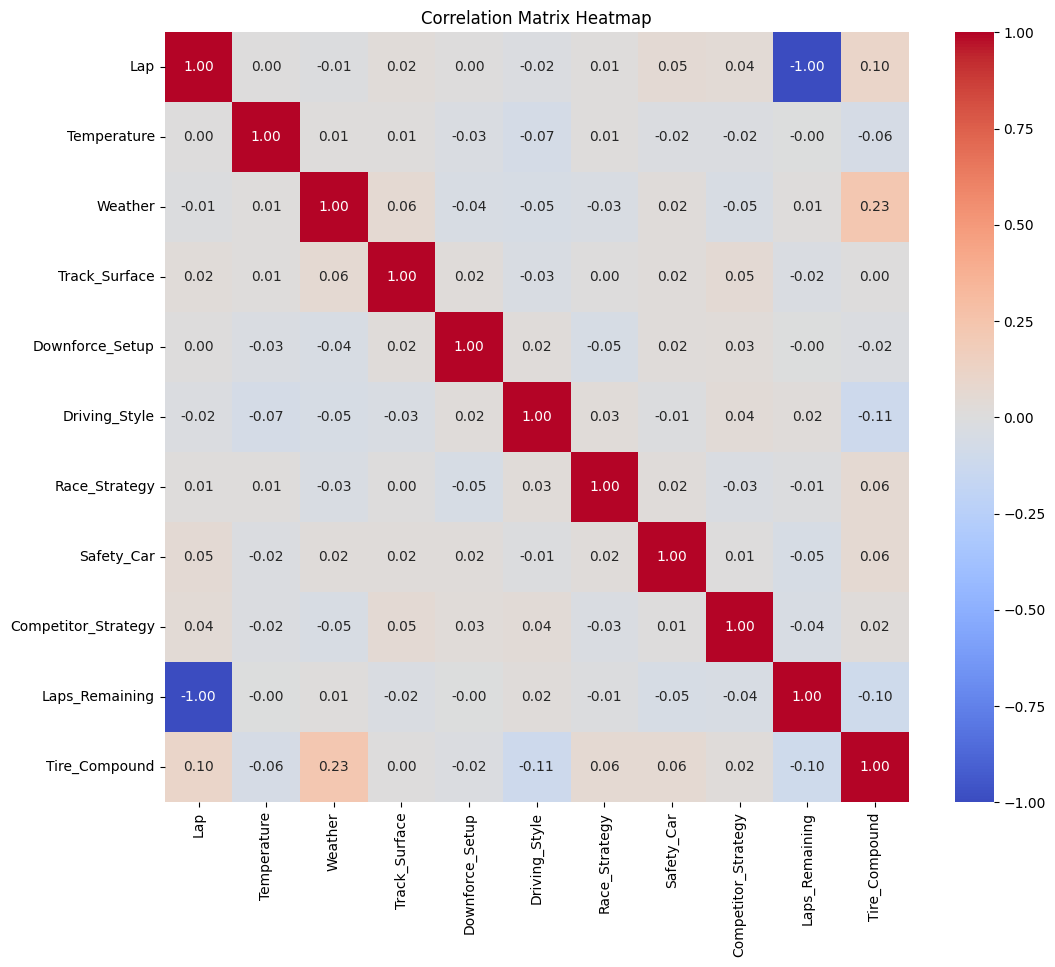

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
df = data.drop(['Race_Strategy', 'Safety_Car', 'Competitor_Strategy', 'Track_Surface', 'Downforce_Setup'], axis=1)
print(df.columns)

Index(['Lap', 'Temperature', 'Weather', 'Driving_Style', 'Laps_Remaining',
       'Tire_Compound'],
      dtype='object')


In [ ]:
features = ['Lap', 'Temperature', 'Weather', 'Driving_Style', 'Laps_Remaining']
target = 'Tire_Compound'
print(features)
print(target)

['Lap', 'Temperature', 'Weather', 'Driving_Style', 'Laps_Remaining']
Tire_Compound


In [ ]:
X =  df[features]
Y = df[target]

#Train-Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# Initialize the Scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer with the shape of your features
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(32, activation='relu'),  # Another hidden layer
    layers.Dense(len(np.unique(Y_train)), activation='softmax')  # Output layer with softmax activation
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,629 (10.27 KB)

 Trainable params: 2,629 (10.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (validation loss in this case)
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with Early Stopping
history = model.fit(
    X_train_scaled,
    Y_train,
    epochs=100,  # You can set a larger number of epochs, as Early Stopping will stop it earlier if needed
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]  # Pass the Early Stopping callback
)

loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy:', accuracy)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1722 - loss: 1.6180 - val_accuracy: 0.3812 - val_loss: 1.5316
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4286 - loss: 1.4704 - val_accuracy: 0.4250 - val_loss: 1.4407
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4250 - loss: 1.3853 - val_accuracy: 0.4437 - val_loss: 1.3744
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4363 - loss: 1.3248 - val_accuracy: 0.4875 - val_loss: 1.3136
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5122 - loss: 1.2259 - val_accuracy: 0.5188 - val_loss: 1.2567
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5672 - loss: 1.1545 - val_accuracy: 0.5750 - val_loss: 1.1965
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6274 - loss: 1.1121 - val_accuracy: 0.6125 - val_loss: 1.1319
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7341 - loss: 1.0113 - val_accuracy: 0.6562 - 

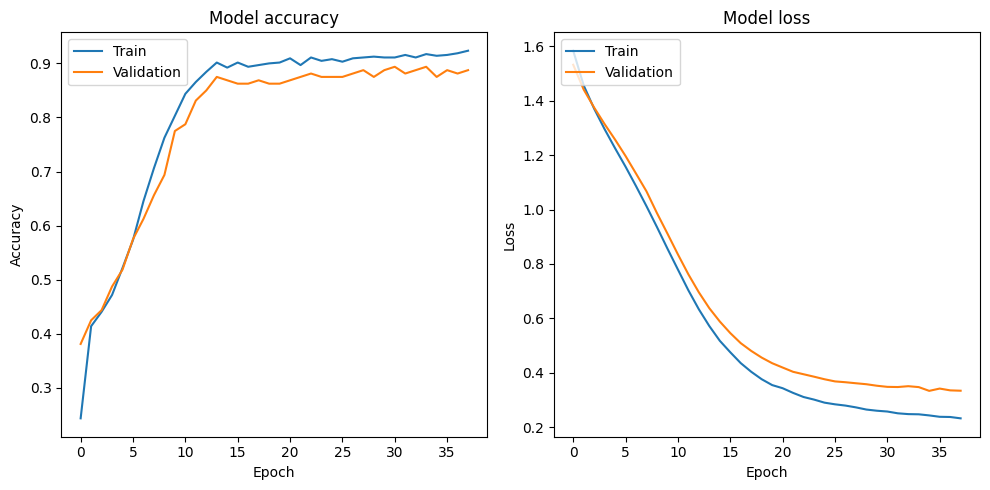

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions
Y_pred_probs = model.predict(X_test_scaled)
Y_pred = np.argmax(Y_pred_probs, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display confusion matrix (optional, but helpful for visualization)
print("Confusion Matrix:")
print(cm)

# Generate classification report with F1-score, precision, recall, support, etc.
report = classification_report(Y_test, Y_pred)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[13  0  3  0  0]
 [ 0 56  0  0  0]
 [ 3  0 35 10  0]
 [ 0  0  4 33  0]
 [ 0  0  0  0 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       1.00      1.00      1.00        56
           2       0.83      0.73      0.78        48
           3       0.77      0.89      0.82        37
           4       1.00      1.00      1.00        43

    accuracy                           0.90       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.90      0.90      0.90       200



In [ ]:
# Save the entire model to a HDF5 file
model.save('race_strategy_model.h5')

In [ ]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('race_strategy_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp6xf1stgh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137071537477520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137071487991632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137071537471568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137071487764048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137071487991440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137071537475408: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv("Race_Strategy_Dataset.csv")

# Define the features used in the model
features = ['Lap', 'Temperature', 'Weather', 'Driving_Style', 'Laps_Remaining']

# Convert categorical columns into numerical values (like in FastAPI)
weather_mapping = {"Sunny": 0, "Cloudy": 1, "Rainy": 2, "Mixed": 3}
driving_style_mapping = {"Aggressive": 0, "Balanced": 1, "Conservative": 2}

df["Weather"] = df["Weather"].map(weather_mapping)
df["Driving_Style"] = df["Driving_Style"].map(driving_style_mapping)

# Handle missing values if necessary
df.dropna(subset=features, inplace=True)

# Train a scaler
scaler = StandardScaler()
scaler.fit(df[features])  # Fit the scaler with numerical data

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved successfully!")

Scaler saved successfully!


In [ ]:

import numpy as np
import joblib
import pandas as pd

# ... your existing code ...

# Load the scaler
scaler = joblib.load("scaler.pkl")

# Create sample input data (replace with your actual data)
input_data_example = pd.DataFrame({
    'Lap': [50],
    'Temperature': [25],
    'Weather': [1],  # Assuming 'Cloudy' (mapped to 1 in your Label Encoding)
    'Driving_Style': [0],  # Assuming 'Aggressive' (mapped to 0)
    'Laps_Remaining': [20]
})

# Transform the input data using the loaded scaler
input_data = scaler.transform(input_data_example)

# Now, you can make the prediction
probs = model.predict(input_data)
print(probs)  # See the confidence level for each class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[2.6249432e-04 9.7845364e-01 2.3656378e-03 1.4766707e-02 4.1515366e-03]]


In [ ]:
print(data.groupby("Tire_Compound").count())


               Lap  Temperature  Weather  Track_Surface  Downforce_Setup  \
Tire_Compound                                                              
0               96           96       96             96               96   
1              274          274      274            274              274   
2              247          247      247            247              247   
3              147          147      147            147              147   
4              236          236      236            236              236   

               Driving_Style  Race_Strategy  Safety_Car  Competitor_Strategy  \
Tire_Compound                                                                  
0                         96             96          96                   96   
1                        274            274         274                  274   
2                        247            247         247                  247   
3                        147            147         147            

In [ ]:
print(data["Tire_Compound"].unique())


[2 1 3 4 0]


In [ ]:
print(data[data["Tire_Compound"] == 2].shape[0])


247


In [ ]:
print(data["Tire_Compound"].value_counts())


Tire_Compound
1    274
2    247
4    236
3    147
0     96
Name: count, dtype: int64


In [ ]:
print(data["Tire_Compound"].value_counts())


Tire_Compound
1    274
2    247
4    236
3    147
0     96
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame with the encoded 'Weather' column
weather_conditions = data['Weather'].unique()  # Get unique encoded weather values
original_weather_conditions = ['Sunny', 'Cloudy', 'Rainy', 'Mixed']  # Your original weather values

# Create a dictionary to store the mapping
weather_mapping = {}

# Iterate and create the mapping
for i, encoded_value in enumerate(weather_conditions):
    weather_mapping[original_weather_conditions[i]] = encoded_value

# Print the mapping
print("Weather Mapping (Encoded Values):")
for weather_condition, encoded_value in weather_mapping.items():
    print(f"{weather_condition}: {encoded_value}")

Weather Mapping (Encoded Values):
Sunny: 3
Cloudy: 1
Rainy: 0
Mixed: 2


In [ ]:
from imblearn.over_sampling import SMOTE

X = data.drop(columns=["Tire_Compound"])
y = data["Tire_Compound"]

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight("balanced", classes=np.unique(y), y=y)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

model.fit(X_train, Y_train, class_weight=class_weight_dict)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2297 - loss: 21.0322


In [ ]:
# Assuming your model has a predict method
probs = model.predict(input_data)  # Use predict instead of predict_proba
class_labels = ["Hard", "Intermediate", "Medium", "Soft", "Wet"]
for i, label in enumerate(class_labels):
    print(f"{label}: {probs[0][i] * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Hard: 0.02%
Intermediate: 97.51%
Medium: 0.88%
Soft: 0.87%
Wet: 0.71%


In [ ]:
# Check your class weights to verify that they make sense
print(class_weight_dict)



{0: np.float64(2.0833333333333335), 1: np.float64(0.7299270072992701), 2: np.float64(0.8097165991902834), 3: np.float64(1.3605442176870748), 4: np.float64(0.847457627118644)}


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming y is your target variable
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(class_weight_dict)


{0: np.float64(2.0833333333333335), 1: np.float64(0.7299270072992701), 2: np.float64(0.8097165991902834), 3: np.float64(1.3605442176870748), 4: np.float64(0.847457627118644)}


In [ ]:
class_weight_dict[0] = 1.0  # Adjust the weight for 'Hard' tires
model.fit(X_train, Y_train, class_weight=class_weight_dict, epochs=50)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8892 - loss: 0.3969 
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8906 - loss: 0.3704
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8923 - loss: 0.3767 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9084 - loss: 0.3284 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9119 - loss: 0.3115 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9189 - loss: 0.2993 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9049 - loss: 0.3177 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9273 - loss: 0.2791
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9054 - loss: 0.3343 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9020 - loss: 0.3081 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8977 - loss: 0.3072
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8998 - loss: 0.2694  
Test Accuracy: 90.50%
Test Loss: 0.2636


In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # If the model is outputting probabilities


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
model.save("tire_compound_predictor.h5")  # Save the model


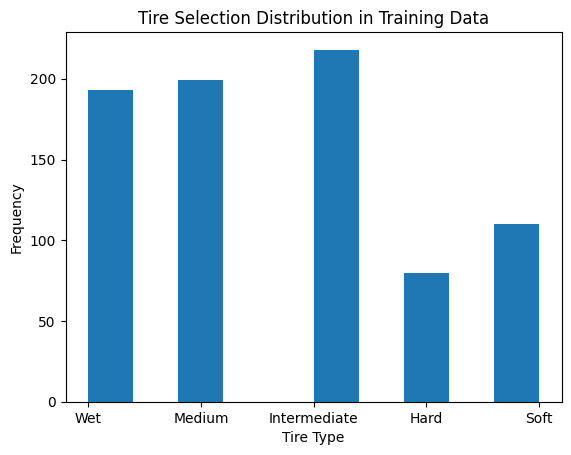

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ... (your existing code to load data and define features) ...

# Perform the train-test split here before using y_train
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# ... (rest of your code, including the plotting section) ...

# Assuming 'y_train' contains your tire choice labels (e.g., "Soft", "Medium", "Hard", etc.)
plt.hist(y_train)
plt.title("Tire Selection Distribution in Training Data")
plt.xlabel("Tire Type")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# ... (your existing code to load the model and scaler) ...
#Load the trained model
model = tf.keras.models.load_model("tire_compound_predictor.h5")

# Load preprocessing tools (if used)
scaler = joblib.load("scaler.pkl")  # Assuming you scale
# Test with adjusted temperature and driving style
test_input = {
    "Lap": 1,  # Changed to uppercase "Lap"
    "Temperature": 22,
    "Weather": "Sunny",
    "Driving_Style": "Aggressive",
    "Laps_Remaining": 1  # Changed to uppercase "Laps_Remaining"
}

# 1. Convert 'Weather' and 'Driving_Style' to numerical values using the mappings
weather_mapping = {"Sunny": 0, "Cloudy": 1, "Rainy": 2, "Mixed": 3}
driving_style_mapping = {"Aggressive": 0, "Balanced": 1, "Conservative": 2}

test_input["Weather"] = weather_mapping[test_input["Weather"]]
test_input["Driving_Style"] = driving_style_mapping[test_input["Driving_Style"]]

# 2. Create a DataFrame from the test_input dictionary
test_input_df = pd.DataFrame([test_input])

# 3. Select the features used during training
# Changed to original feature names with correct capitalization
features = ['Lap', 'Temperature', 'Weather', 'Driving_Style', 'Laps_Remaining']
test_input_data = test_input_df[features]

# 4. Scale the input data using the loaded scaler
scaled_test_input = scaler.transform(test_input_data)

# 5. Make the prediction
prediction = model.predict(scaled_test_input)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[5.6470168e-04 3.6226153e-09 9.9274784e-01 6.6873920e-03 1.4903865e-09]]


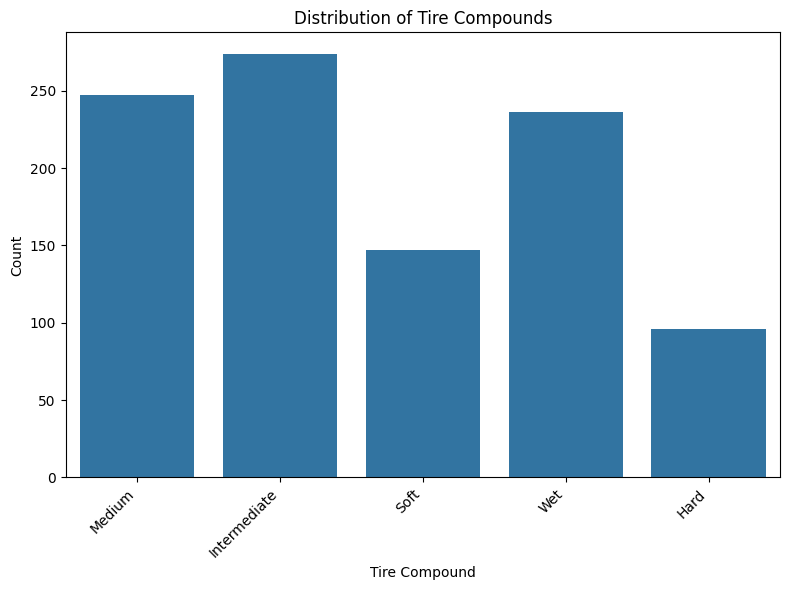

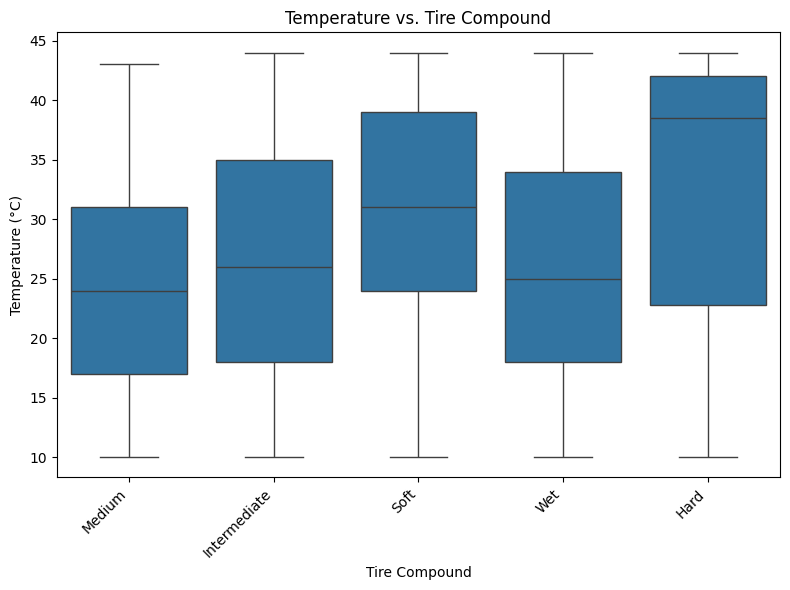

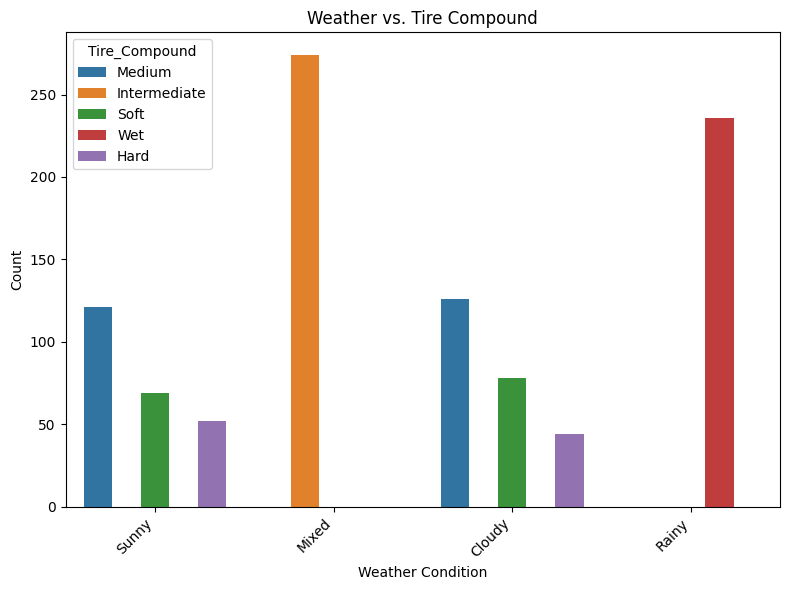

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Race_Strategy_Dataset.csv")

# --- Visualization 1: Tire Compound Distribution ---
plt.figure(figsize=(8, 6))
sns.countplot(x="Tire_Compound", data=data)
plt.title("Distribution of Tire Compounds")
plt.xlabel("Tire Compound")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# --- Visualization 2: Temperature vs. Tire Compound ---
plt.figure(figsize=(8, 6))
sns.boxplot(x="Tire_Compound", y="Temperature", data=data)
plt.title("Temperature vs. Tire Compound")
plt.xlabel("Tire Compound")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- Visualization 3: Weather vs. Tire Compound ---
plt.figure(figsize=(8, 6))
sns.countplot(x="Weather", hue="Tire_Compound", data=data)
plt.title("Weather vs. Tire Compound")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# --- Interpretations ---

# 1. Tire Compound Distribution:
# The visualization shows the frequency of each tire compound selection. You can see which tire compounds are most commonly used and if there's any imbalance in the dataset. This gives you an overall picture of tire usage patterns.

# 2. Temperature vs. Tire Compound:
# This box plot shows the relationship between temperature and tire compound selection. You can observe how different temperature ranges influence the choice of tire compounds. It helps understand the temperature ranges where certain tire compounds are preferred.

# 3. Weather vs. Tire Compound:
# This visualization highlights the impact of weather conditions on tire compound selection. You can see which tire compounds are favored in different weather scenarios, like sunny, rainy, or cloudy conditions. It provides insights into how weather affects strategic decisions.


# --- Story ---
# The visualizations tell a story about the factors that influence race strategy decisions, particularly tire selection.
# - Tire compound choices are influenced by temperature, weather conditions, and track characteristics.
# - Certain tire compounds are favored in specific conditions (e.g., wet tires in rainy weather).
# - Drivers and teams adapt their strategies based on the prevailing conditions to optimize performance.
# - Understanding these relationships can be valuable for predicting optimal tire choices.